In [1]:
#!pip install python-dotenv

In [2]:
#!pip install xmltodict

##install the dependencies 

In [3]:
from dotenv import load_dotenv
import os 
import pandas as pd 
import requests
import json
from pandas import json_normalize
from datetime import datetime, timedelta
import re
from IPython.display import display
import xmltodict
import missingno as msno

In [4]:
#load_dotenv()
#api_key = os.getenv("write api_key")

In [5]:

# # Set up your API key and base URL
# API_KEY = 'api_key'  # Replace with your OpenExchangeRates API key
# BASE_URL = 'https://openexchangerates.org/api/historical'

# # List of dates for which you want to fetch data
# dates = [
#     '2024-09-01', '2024-09-02', '2024-09-03', '2024-09-04', '2024-09-05',
#     '2024-09-06', '2024-09-07', '2024-09-08', '2024-09-09', '2024-09-10',
#     '2024-09-11', '2024-09-12', '2024-09-13', '2024-09-14', '2024-09-15',
#     '2024-09-16', '2024-09-17', '2024-09-18', '2024-09-19', '2024-09-20'
# ]

# # Initialize an empty DataFrame to store the results
# df = pd.DataFrame()

# # Iterate over the list of dates and make API calls
# for date in dates:
#     # Construct the URL for the API call
#     url = f'{BASE_URL}/{date}.json?app_id={API_KEY}'
    
#     # Make the API request
#     response = requests.get(url)
    
#     # Check if the response status code is 200 (OK)
#     if response.status_code == 200:
#         data = response.json()
        
#         # Convert JSON to DataFrame
#         temp_df = pd.DataFrame(data['rates'], index=[date])
        
#         # Append to the main DataFrame
#         df = pd.concat([df, temp_df])
#     else:
#         print(f"Failed to retrieve data for date {date}: {response.status_code}")

# # Print the final DataFrame
# print(df)


In [6]:
# Your OpenExchangeRates API key
# API_KEY = 'api_key'
# BASE_URL = 'https://openexchangerates.org/api/historical'

# # Function to adjust for weekends (returns nearest weekday)
# def adjust_for_weekend(date):
#     # 5 = Saturday, 6 = Sunday
#     if date.weekday() == 5:  # Saturday
#         return date - timedelta(days=1)  # Move to Friday
#     elif date.weekday() == 6:  # Sunday
#         return date + timedelta(days=1)  # Move to Monday
#     return date

# # Generate list of January 15th dates from 1999 to 2024
# years = range(1999, 2025)
# dates = [adjust_for_weekend(datetime(year, 1, 15)) for year in years]

# # Initialize an empty DataFrame to store the results
# df = pd.DataFrame()

# # Iterate over the list of dates and make API calls
# for date in dates:
#     formatted_date = date.strftime('%Y-%m-%d')  # Format the date as YYYY-MM-DD
#     url = f'{BASE_URL}/{formatted_date}.json?app_id={API_KEY}'
    
#     # Make the API request
#     response = requests.get(url)
    
#     # Check if the response status code is 200 (OK)
#     if response.status_code == 200:
#         data = response.json()
        
#         # Convert JSON to DataFrame (data['rates'] has the currency exchange rates)
#         temp_df = pd.DataFrame(data['rates'], index=[formatted_date])
        
#         # Append to the main DataFrame
#         df = pd.concat([df, temp_df])
#     else:
#         print(f"Failed to retrieve data for date {formatted_date}: {response.status_code}")

# # Reset index to get the date as a column
# df.reset_index(inplace=True)
# df.rename(columns={'index': 'date'}, inplace=True)

# # Display the final DataFrame
# print(df)

# # Optionally, save to CSV for later analysis
# # df.to_csv('exchange_rates_1999_2024.csv', index=False)

In [7]:
# Optionally, save to CSV for later analysis
# df.to_csv('exchange_rates_1999_2024.csv', index=False)

## Historical DataFrame from 1999-2024

In [8]:
historical_df = pd.read_csv('exchange_rates_1999_2024.csv')
display(historical_df)

,date,ANG,AUD,AWG,BBD,BMD,BRL,BSD,CAD,CHF,...,IMP,CUC,BYN,XPD,XPT,CNH,MRU,SSP,STN,VES
0,1999-01-15,1.787029,1.578608,1.787029,2.000000,1,1.473715,1.000000,1.528871,1.377330,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-14,1.790000,1.499955,1.790000,2.000000,1,1.804999,1.000000,1.449872,1.587126,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2001-01-15,1.790000,1.806105,1.790000,2.000000,1,1.948974,1.000000,1.502133,1.632163,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2002-01-15,1.790000,1.927788,1.790000,2.000000,1,2.363541,1.000000,1.590466,1.662805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2003-01-15,1.790000,1.711419,1.790000,2.000000,1,3.301954,1.000000,1.538305,1.386698,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2004-01-15,1.790000,1.296937,1.790000,2.000000,1,2.817075,1.000000,1.294399,1.241459,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2005-01-14,1.790000,1.317618,1.790000,2.000000,1,2.707039,1.000000,1.214941,1.182087,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2006-01-16,1.785000,1.326614,1.790000,2.000000,1,2.283255,1.000000,1.159976,1.276854,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2007-01-15,1.782500,1.275762,1.790250,2.000000,1,2.137627,1.000000,1.168376,1.247014,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2008-01-15,1.782500,1.118032,1.790250,2.000000,1,1.743074,1.000000,1.015628,1.090768,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Historical DataFrame (Quarterly) 

In [9]:

# Your OpenExchangeRates API key
# API_KEY = 'api_key'
# BASE_URL = 'https://openexchangerates.org/api/historical'

# # Function to adjust for weekends (returns nearest weekday)
# def adjust_for_weekend(date):
#     # 5 = Saturday, 6 = Sunday
#     if date.weekday() == 5:  # Saturday
#         return date - timedelta(days=1)  # Move to Friday
#     elif date.weekday() == 6:  # Sunday
#         return date + timedelta(days=1)  # Move to Monday
#     return date

# # Define the last day of each quarter
# def generate_quarter_dates(year):
#     return [
#         datetime(year, 3, 31),  # Q1
#         datetime(year, 6, 30),  # Q2
#         datetime(year, 9, 30),  # Q3
#         datetime(year, 12, 31)  # Q4
#     ]

# # Generate all quarterly dates from 1999 to 2023
# years = range(1999, 2024)
# dates = [adjust_for_weekend(date) for year in years for date in generate_quarter_dates(year)]

# # Initialize a list to store individual DataFrames
# data_frames_q = []

# Iterate over the list of dates and make API calls
# for date in dates:
#     formatted_date = date.strftime('%Y-%m-%d')  # Format the date as YYYY-MM-DD
#     url = f'{BASE_URL}/{formatted_date}.json?app_id={api_key}'
    
#     # Make the API request
#     response = requests.get(url)
    
#     # Check if the response status code is 200 (OK)
#     if response.status_code == 200:
#         data = response.json()
        
#         # Convert JSON to DataFrame (data['rates'] has the currency exchange rates)
#         temp_df = pd.DataFrame(data['rates'], index=[formatted_date])
        
#         # Append the temporary DataFrame to the list
#         data_frames_q.append(temp_df)
#     else:
#         print(f"Failed to retrieve data for date {formatted_date}: {response.status_code}")

# # Concatenate all the DataFrames at once
# dfh_q = pd.concat(data_frames_q)

# # Reset index to get the date as a column
# dfh_q.reset_index(inplace=True)
# dfh_q.rename(columns={'index': 'date'}, inplace=True)

# # Display the final DataFrame
# print(dfh_q)

# Optionally, save to CSV for later analysis
# dfh_q.to_csv('exchange_rates_quarterly_1999_2024.csv', index=False)


In [10]:
# Optionally, save to CSV for later analysis
# dfh_q.to_csv('exchange_rates_quarterly_1999_2024.csv', index=False)


In [55]:
historical_q_df = pd.read_csv('exchange_rates_quarterly_1999_2024.csv')
historical_q_df

,date,ANG,AUD,AWG,BBD,BMD,BRL,BSD,CAD,CHF,CNY,CYP,CZK,DKK,EEK,EUR,FKP,GBP,GRD,HKD,HUF,IDR,IEP,INR,ISK,JPY,KPW,KRW,LKR,LTL,LVL,MTL,MXN,MYR,NOK,NZD,PAB,PHP,PLN,RON,RUB,SAR,SEK,SGD,SHP,SIT,SKK,THB,TRY,TWD,USD,VEF,ZAR,XDR,XPF,ARS,DZD,HRK,ILS,MAD,AED,ALL,BDT,BHD,BIF,BND,BOB,BTN,BWP,BZD,CLP,COP,CRC,CVE,DJF,DOP,EGP,ETB,FJD,GIP,GMD,GNF,GTQ,GYD,HNL,HTG,IQD,IRR,JMD,JOD,KES,KHR,KMF,KWD,KZT,LAK,LBP,LSL,LYD,MMK,MNT,MOP,MRO,MUR,MVR,MWK,NAD,NGN,NIO,NPR,OMR,PEN,PGK,PKR,PYG,QAR,SBD,SCR,SOS,SVC,SYP,SZL,TND,TOP,TTD,TZS,UAH,UGX,VND,VUV,WST,XAF,XCD,XOF,ZMK,ZWD,BGN,SLL,STD,AMD,BYR,CDF,GEL,KGS,MDL,MKD,RWF,TJS,UZS,YER,UYU,LRD,AOA,MGA,AFN,AZN,BAM,GHS,MZN,RSD,SDG,SRD,CLF,TMT,JEP,KYD,ZWL,BTC,CUP,XAG,XAU,ZMW,ERN,GGP,IMP,CUC,BYN,XPD,XPT,CNH,SSP,MRU,STN,VES
0,1999-03-31,1.813391,1.582633,1.813391,2.000000,1,1.721133,1.000000,1.509070,1.483317,8.275000,0.539699,35.901562,6.902859,14.496282,0.928227,0.620388,0.620186,304.496805,7.749183,237.249518,8667.134262,0.731632,42.468220,72.802733,118.859041,900.000000,1210.013877,69.450000,4.017840,0.589582,0.401079,9.527052,3.801413,7.753440,1.881057,1.000000,38.869890,3.988204,1.497082,25.019158,3.750065,8.245975,1.726728,0.620388,177.235566,41.979726,37.599053,0.371513,33.155645,1,0.585853,6.173976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1999-06-30,1.798486,1.510377,1.798486,2.000000,1,1.776095,1.000000,1.472262,1.551979,8.274350,0.559495,35.178635,7.201709,15.115121,0.968274,0.634479,0.634482,315.138385,7.757766,242.836564,6642.702288,0.763726,43.410010,74.819489,120.948345,900.000000,1158.382925,71.590000,3.982147,0.599704,0.411568,9.424560,3.799660,7.855748,1.894666,1.000000,37.939166,3.920282,1.593166,24.347195,3.750770,8.475232,1.700560,0.634479,189.948564,43.990557,36.871015,0.423142,32.297018,1,0.606003,6.045909,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1999-09-30,1.790000,1.533888,1.790000,2.000000,1,1.924578,1.000000,1.468025,1.498529,8.273900,0.545397,33.519433,6.974797,14.605880,0.937872,0.607263,0.607364,308.342301,7.767705,242.192206,8414.831521,0.739029,43.562065,71.605720,106.202977,900.000000,1217.198120,71.780000,3.999625,0.579184,0.399607,9.362808,3.799961,7.754149,1.935503,1.000000,41.027460,4.096296,1.651928,25.254556,3.750065,8.186215,1.699839,0.607263,183.981934,40.386228,41.069848,0.459305,31.824008,1,0.625464,6.005650,0.720581,111.890952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1999-12-31,1.790000,1.525918,1.790000,2.000000,1,1.806813,1.000000,1.447219,1.592193,8.274750,0.572976,35.954454,7.396185,15.565408,0.991874,0.618877,0.618592,330.021307,7.772905,251.766863,7049.71

In [12]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(historical_q_df)

In [13]:
historical_q_df.head()

,date,ANG,AUD,AWG,BBD,BMD,BRL,BSD,CAD,CHF,...,IMP,CUC,BYN,XPD,XPT,CNH,SSP,MRU,STN,VES
0,1999-03-31,1.813391,1.582633,1.813391,2.0,1,1.721133,1.0,1.509070,1.483317,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1999-06-30,1.798486,1.510377,1.798486,2.0,1,1.776095,1.0,1.472262,1.551979,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1999-09-30,1.790000,1.533888,1.790000,2.0,1,1.924578,1.0,1.468025,1.498529,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1999-12-31,1.790000,1.525918,1.790000,2.0,1,1.806813,1.0,1.447219,1.592193,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-03-31,1.790000,1.650275,1.790000,2.0,1,1.751612,1.0,1.451905,1.664124,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
historical_q_df.tail()

,date,ANG,AUD,AWG,BBD,BMD,BRL,BSD,CAD,CHF,CNY,CZK,DKK,EEK,EUR,FKP,GBP,HKD,HUF,IDR,IEP,INR,ISK,JPY,KPW,KRW,LKR,LTL,LVL,MTL,MXN,MYR,NOK,NZD,PAB,PHP,PLN,RON,RUB,SAR,SEK,SGD,SHP,THB,TRY,TWD,USD,VEF,ZAR,XDR,XPF,ARS,DZD,HRK,ILS,MAD,AED,ALL,BDT,BHD,BIF,BND,BOB,BTN,BWP,BZD,CLP,COP,CRC,CVE,DJF,DOP,EGP,ETB,FJD,GIP,GMD,GNF,GTQ,GYD,HNL,HTG,IQD,IRR,JMD,JOD,KES,KHR,KMF,KWD,KZT,LAK,LBP,LSL,LYD,MMK,MNT,MOP,MRO,MUR,MVR,MWK,NAD,NGN,NIO,NPR,OMR,PEN,PGK,PKR,PYG,QAR,SBD,SCR,SOS,SVC,SYP,SZL,TND,TOP,TTD,TZS,UAH,UGX,VND,VUV,WST,XAF,XCD,XOF,ZMK,BGN,SLL,STD,AMD,BYR,CDF,GEL,KGS,MDL,MKD,RWF,TJS,UZS,YER,UYU,LRD,AOA,MGA,AFN,AZN,BAM,GHS,MZN,RSD,SDG,SRD,CLF,TMT
95,2022-12-30,1.802385,1.469508,1.8000,2.0,1,5.2863,1.0,1.356944,0.924567,6.8983,22.569333,6.94740,NaN,0.932304,0.826583,0.826583,7.81335,373.370000,15534.30,NaN,82.749988,141.55,131.115042,900.0,1261.910033,364.752376,NaN,NaN,NaN,19.4821,4.40500,9.797800,1.575052,1.0,55.679993,4.381650,4.6193,73.709900,3.758788,10.427300,1.34060,0.826583,34.530369,18.685800,30.662698,1,NaN,17.023015,0.751548,111.253430,176.374184,137.179376,7.04220,3.52620,10.438750,3.672650,107.15000,103.159197,0.376580,2062.000000,1.345463,6.910305,82.580061,12.794278,2.015840,848.500000,4828.102895,584.108955,103.55000,177.500000,56.250000,24.719500,53.650000,2.22050,0.826583,61.9500,8770.000000,7.848190,209.232695,24.700000,146.703253,1460.500000,41850.0,151.711898,0.7093,123.500000,4118.500000,460.224482,0.305435,462.856977,17342.500000,1522.500000,17.010000,4.825000,2100.163690,3406.965265,8.027878,NaN,43.949999,15.405,1024.500000,17.010000,448.080000,36.40000,132.128343,0.384991,3.804000,3.52000,226.550000,7332.946070,3.640750,8.278288,13.405776,569.500000,8.751124,2512.53,17.010000,3.12400,2.341265,6.796026,2332.000000,36.856003,3720.224466,23640.000000,118.044,2.69755,611.551166,2.70255,611.551166,NaN,1.827155,17665.0,22823.990504,393.731540,NaN,2030.000000,2.7000,85.6800,19.131518,57.724919,1070.000000,10.196018,11225.000000,250.299958,39.974162,154.450017,503.691000,4480.000000,87.499995,1.700000,1.834694,8.347259,63.850001,109.441576,572.0,31.8090,0.030750,3.50
96,2023-03-31,1.800948,1.495215,1.8000,2.0,1,5.0633,1.0,1.352850,0.914900,6.8688,21.645500,6.87110,NaN,0.920175,0.810045,0.810045,7.84995,350.200164,14968.65,NaN,82.180650,137.34,132.775059,900.0,1306.470000,330.057649,NaN,NaN,NaN,18.0170,4.41250,10.489800,1.597955,1.0,54.292496,4.316148,4.5636,77.526003,3.752320,10.378500,1.33080,0.810045,34.084157,19.178200,30.540100,1,NaN,17.793855,0.743797,109.806068,208.389535,135.812849,6.94927,3.60045,10.224000,3.672700,104.30000,107.017610,0.376561,2085.000000,1.327599,6.905270,82.027328,13.009750,2.014213,790.910000,4644.704933,539.530687,101.57000,177.827972,54.800000,30.718984,53.900000,2.21050,0.810045,62.1500,8650.000000,7.782658,211.020087,24.660000,154.664635,1460.000000,42275.0,150.642187,0.7094,132.500000,4052.000000,452.375197,0.306665,454.822571,17005.000000,15036.832990,17.829125,4.780000,2098.460655,3519.000000,8.079764,NaN,45.449996,15.410,1022.500000,17.880000,460.340000,36.57500,131.243314,0.385053,3.763000,3.52000,283.800000,7146.119136,3.641000,8.232259,13.929871,568.500000,8.731536,2512.53,17.805000,3.04850,2.350642,6.773282,2338.855000,36.671684,3762.185710,23485.000000,118.979,2.72551,603.595135,2.70255,603.595135,NaN,1.796844,17665.0,22823.990504,388.480000,NaN,2046.000000,2.5475,87.4200,18.301699,56.561337,1108.700249,10.917056,11415.000000,250.350023,38.806163,162.300016,507.500000,4329.000000,86.756147,1.700000,1.795531,11.650000,63.899991,108.209829,595.5,36.0975,0.028663,3.51
97,2023-06-30,1.802442,1.500850,1.8025,2.0,1,4.7898,1.0,1.324830,0.895100,7.2537,21.775600,6.82445,NaN,0.916050,0.788626,0.788626,7.83665,341.700000,15040.30,NaN,82.096248,136.27,144.334928,900.0,1316.300773,308.034007,NaN,NaN,NaN,17.1243,4.66750,10.740600,1.629184,1.0,55.273999,4.064076,4.5450,88.826007,3.750807,10.793900,1.35220,0.788626,35.224974,26.051100,31.161300,1,NaN,18.820355,0.750037,109.313842,256.501673,135.809026

In [15]:
historical_q_df.describe()

,ANG,AUD,AWG,BBD,BMD,BRL,BSD,CAD,CHF,CNY,...,IMP,CUC,BYN,XPD,XPT,CNH,SSP,MRU,STN,VES
count,100.000000,100.000000,100.000000,100.000000,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,...,39.000000,36.000000,31.000000,29.000000,29.000000,28.000000,28.000000,25.000000,25.000000,2.200000e+01
mean,1.789434,1.357831,1.792926,2.000118,1.0,2.965945,1.000034,1.252135,1.122229,7.170370,...,0.750771,1.000003,2.363861,0.000722,0.001087,6.789628,129.220291,36.610562,21.979305,5.103829e+05
std,0.017013,0.253104,0.005087,0.001180,0.0,1.207633,0.000344,0.173058,0.248244,0.791244,...,0.064814,0.000063,0.411617,0.000296,0.000110,0.286732,3.860625,1.179218,1.166740,1.140264e+06
min,1.687163,0.932619,1.777504,2.000000,1.0,1.564071,1.000000,0.964519,0.838753,6.065775,...,0.584565,0.999805,1.879851,0.000360,0.000841,6.262700,110.682350,34.150000,19.980000,4.371600e+00
25%,1.784992,1.180006,1.790000,2.000000,1.0,1.960063,1.000000,1.097009,0.944883,6.514077,...,0.724272,1.000000,1.996641,0.000513,0.001032,6.550911,130.260000,36.010718,21.270000,2.530460e+01
50%,1.790000,1.338127,1.790250,2.000000,1.0,2.552780,1.000000,1.267779,0.995734,6.868850,...,0.760750,1.000000,2.421409,0.000645,0.001094,6.821031,130.260000,36.415000,21.950000,1.963040e+03
75%,1.790800,1.469537,1.797747,2.000000,1.0,3.843812,1.000000,1.352959,1.252022,8.270975,...,0.794024,1.000000,2.543207,0.000935,0.001156,6.987745,130.260000,37.453333,22.630000,1.709884e+05
max,1.882599,2.055296,1.813391,2.011799,1.0,5.632800,1.003438,1.598507,1.795420,8.276837,...,0.896861,1.000320,3.375838,0.001468,0.001380,7.287410,130.263400,39.328233,25.350000,4.171611e+06


In [16]:
historical_q_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 184 entries, date to VES
dtypes: float64(181), int64(2), object(1)
memory usage: 143.9+ KB


In [17]:
historical_q_df.nunique()

date    100
ANG      54
AUD     100
AWG      29
BBD       2
       ... 
CNH      28
SSP       5
MRU      24
STN      24
VES      22
Length: 184, dtype: int64

In [56]:
historical_q_df.isna().sum()

date     0
ANG      0
AUD      0
AWG      0
BBD      0
BMD      0
BRL      0
BSD      0
CAD      0
CHF      0
CNY      0
CYP     65
CZK      0
DKK      0
EEK     35
EUR      0
FKP      0
GBP      0
GRD     92
HKD      0
HUF      0
IDR      0
IEP     46
INR      0
ISK      0
JPY      0
KPW      0
KRW      0
LKR      0
LTL     27
LVL     27
MTL     48
MXN      0
MYR      0
NOK      0
NZD      0
PAB      0
PHP      0
PLN      0
RON      1
RUB      0
SAR      0
SEK      0
SGD      0
SHP      0
SIT     69
SKK     61
THB      0
TRY      1
TWD      0
USD      0
VEF     12
ZAR      0
XDR      2
XPF      2
ARS      4
DZD      4
HRK      4
ILS      4
MAD      4
AED      5
ALL      5
BDT      5
BHD      5
BIF      5
BND      5
BOB      5
BTN      5
BWP      5
BZD      5
CLP      5
COP      5
CRC      5
CVE      5
DJF      5
DOP      5
EGP      5
ETB      5
FJD      5
GIP      5
GMD      5
GNF      5
GTQ      5
GYD      5
HNL      5
HTG      5
IQD      5
IRR      5
JMD      5
JOD      5
KES      5

In [19]:

# Thresholds for deciding whether to drop or impute
drop_threshold = 0.5  # Drop columns with more than 60% missing data

# Calculate percentage of missing values
missing_values = historical_q_df.isna().mean()

# Drop columns with more than 60% missing values
columns_to_drop = missing_values[missing_values > drop_threshold].index
historical_q_df = historical_q_df.drop(columns=columns_to_drop)

In [20]:
#historical_q_df.columns.values.tolist()

In [21]:
historical_q_df.isna().sum()

date     0
ANG      0
AUD      0
AWG      0
BBD      0
        ..
RSD     37
SDG     37
SRD     37
CLF     48
TMT     48
Length: 159, dtype: int64

as i am struggling to pin down the currencies which sparsity should or should not affect my project , for n

<Axes: >

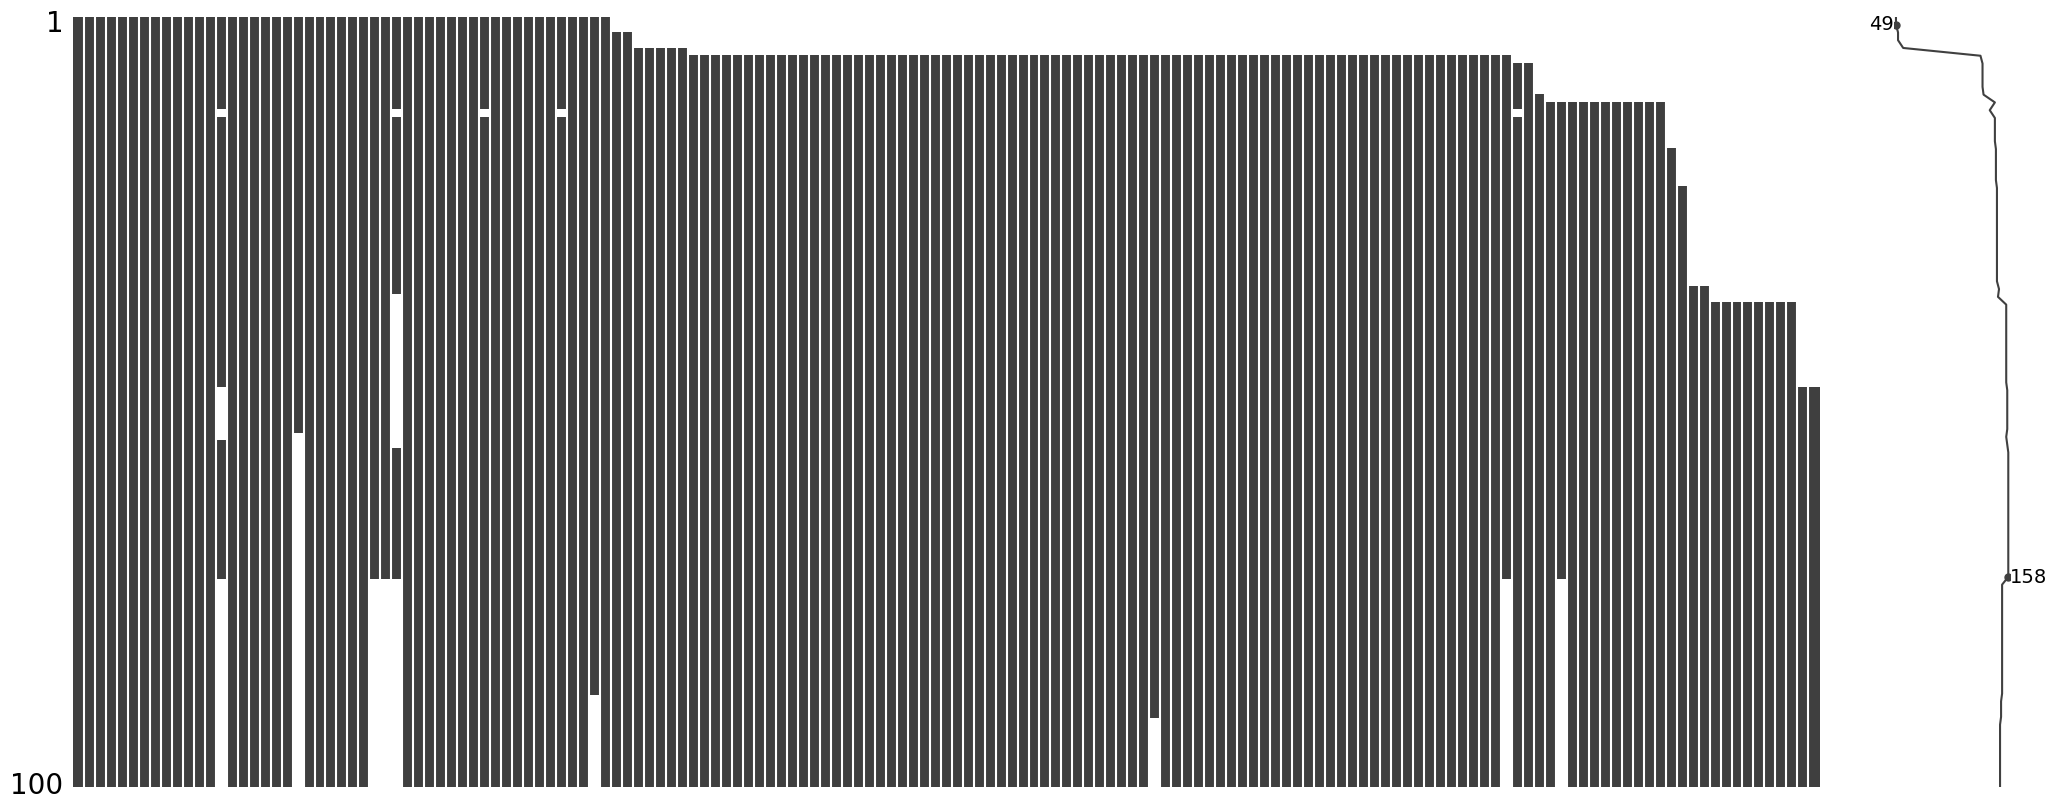

In [22]:
msno.matrix(historical_q_df)

In [54]:

#ensure the date is in datetime format
historical_q_df['date'] = pd.to_datetime(historical_q_df['date'])

# Filter for the most recent quarters (e.g., 2020 onwards)
recent_data = historical_q_df[historical_q_df['date'].dt.year >= 2010]  # Adjust the year as needed

# Check for missing data in the recent quarters for each currency
missing_recent_data = recent_data.isnull().sum()

# Identify currencies (columns) missing data in recent quarters
currencies_with_missing_recent_data = missing_recent_data[missing_recent_data > 0]

# Output the result
print("Currencies missing data for recent quarters:")
print(currencies_with_missing_recent_data)


Currencies missing data for recent quarters:
EEK    34
IEP    46
LTL    27
LVL    27
MTL    39
VEF    12
MRO     9
ZMK    27
BYR    27
CLF     4
TMT     4
dtype: int64


In [23]:
# with open('config.json') as config_file:
#     config = json.load(config_file)
#     api_key = config['api_key']
# print(api_key)

## Current Exchange Rates

In [24]:
# Load the API key from the config.json file
with open('config.json') as config_file:
    config = json.load(config_file)
    api_key = config['api_key']

# Define the URL and headers
url = f'https://openexchangerates.org/api/latest.json?app_id={api_key}'
#headers = {'Authorization': f'Bearer {api_key}'}

# Make the request
response = requests.get(url)

# Print the status code

print(response.status_code)
# Optionally print the response content
print(response.json())


200
{'disclaimer': 'Usage subject to terms: https://openexchangerates.org/terms', 'license': 'https://openexchangerates.org/license', 'timestamp': 1735221600, 'base': 'USD', 'rates': {'AED': 3.673045, 'AFN': 70.133986, 'ALL': 94.63576, 'AMD': 397.928428, 'ANG': 1.799356, 'AOA': 912, 'ARS': 1025.2769, 'AUD': 1.606331, 'AWG': 1.8, 'AZN': 1.7, 'BAM': 1.8785, 'BBD': 2, 'BDT': 119.310384, 'BGN': 1.881, 'BHD': 0.377221, 'BIF': 2952.315154, 'BMD': 1, 'BND': 1.356673, 'BOB': 6.899102, 'BRL': 6.1739, 'BSD': 1, 'BTC': 1.0460828e-05, 'BTN': 84.985834, 'BWP': 13.866398, 'BYN': 3.267348, 'BZD': 2.009028, 'CAD': 1.439518, 'CDF': 2840.426039, 'CHF': 0.900782, 'CLF': 0.035882, 'CLP': 990.38, 'CNH': 7.305888, 'CNY': 7.2991, 'COP': 4376.16, 'CRC': 506.939574, 'CUC': 1, 'CUP': 25.75, 'CVE': 105.906945, 'CZK': 24.150075, 'DJF': 177.827972, 'DKK': 7.171242, 'DOP': 60.81737, 'DZD': 135.22602, 'EGP': 50.880111, 'ERN': 15, 'ETB': 127.121943, 'EUR': 0.961305, 'FJD': 2.31865, 'FKP': 0.798473, 'GBP': 0.798473, '

In [25]:
 latest = response.json()
# print(latest)

In [26]:
latest_df = pd.DataFrame(latest)


In [27]:
latest_df = latest_df.reset_index().rename(columns={'index': 'Currency'})


In [28]:
latest_df[['Currency']]

,Currency
0,AED
1,AFN
2,ALL
3,AMD
4,ANG
...,...
164,XPT
165,YER
166,ZAR
167,ZMW


In [29]:
latest_df.head()

,Currency,disclaimer,license,timestamp,base,rates
0,AED,Usage subject to terms: https://openexchangera...,https://openexchangerates.org/license,1735221600,USD,3.673045
1,AFN,Usage subject to terms: https://openexchangera...,https://openexchangerates.org/license,1735221600,USD,70.133986
2,ALL,Usage subject to terms: https://openexchangera...,https://openexchangerates.org/license,1735221600,USD,94.635760
3,AMD,Usage subject to terms: https://openexchangera...,https://openexchangerates.org/license,1735221600,USD,397.928428
4,ANG,Usage subject to terms: https://openexchangera...,https://openexchangerates.org/license,1735221600,USD,1.799356


In [30]:
latest_df1 = latest_df

In [31]:
 latest_df1 = latest_df1.drop(columns = ['disclaimer','license'])
latest_df1

,Currency,timestamp,base,rates
0,AED,1735221600,USD,3.673045
1,AFN,1735221600,USD,70.133986
2,ALL,1735221600,USD,94.635760
3,AMD,1735221600,USD,397.928428
4,ANG,1735221600,USD,1.799356
...,...,...,...,...
164,XPT,1735221600,USD,0.001055
165,YER,1735221600,USD,249.871726
166,ZAR,1735221600,USD,18.751100
167,ZMW,1735221600,USD,27.630984


In [32]:
# data = response.json()
# Convert Unix timestamps to readable datetime format
latest_df1['date'] = pd.to_datetime(latest_df1['timestamp'], unit='s').dt.date  # Keep only the date


In [33]:
# print(json.dumps(data, indent=2
latest_df1 = latest_df1.drop(columns = ['timestamp'])


In [34]:
# historical_df = pd.DataFrame(data)
latest_df1

,Currency,base,rates,date
0,AED,USD,3.673045,2024-12-26
1,AFN,USD,70.133986,2024-12-26
2,ALL,USD,94.635760,2024-12-26
3,AMD,USD,397.928428,2024-12-26
4,ANG,USD,1.799356,2024-12-26
...,...,...,...,...
164,XPT,USD,0.001055,2024-12-26
165,YER,USD,249.871726,2024-12-26
166,ZAR,USD,18.751100,2024-12-26
167,ZMW,USD,27.630984,2024-12-26


In [35]:
#read the list of countries and it's currencies into a data frame.

country_code = pd.read_csv('country_currency_codes.csv')

In [36]:
country_code

,Country/Territory,Currency Name,Currency
0,Afghanistan,Afghan afghani,AFN
1,Albania,Albanian lek,ALL
2,Algeria,Algerian dinar,DZD
3,Angola,Angolan kwanza,AOA
4,Anguilla (UK),East Caribbean dollar,XCD
...,...,...,...
242,Wake Island (USA),United States dollar,USD
243,Wallis and Futuna (France),CFP franc,XPF
244,Yemen,Yemeni rial,YER
245,Zambia,Zambian kwacha,ZMW


### Current Exchange Rates merged with respective Country

In [37]:
latest_merge = pd.merge(country_code, latest_df1, how = 'inner',on = 'Currency')

In [38]:
latest_merge

,Country/Territory,Currency Name,Currency,base,rates,date
0,Afghanistan,Afghan afghani,AFN,USD,70.133986,2024-12-26
1,Albania,Albanian lek,ALL,USD,94.635760,2024-12-26
2,Algeria,Algerian dinar,DZD,USD,135.226020,2024-12-26
3,Angola,Angolan kwanza,AOA,USD,912.000000,2024-12-26
4,Anguilla (UK),East Caribbean dollar,XCD,USD,2.702550,2024-12-26
...,...,...,...,...,...,...
241,Wake Island (USA),United States dollar,USD,USD,1.000000,2024-12-26
242,Wallis and Futuna (France),CFP franc,XPF,USD,114.714172,2024-12-26
243,Yemen,Yemeni rial,YER,USD,249.871726,2024-12-26
244,Zambia,Zambian kwacha,ZMW,USD,27.630984,2024-12-26


In [39]:
pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_rows", None)  # Show all rows
display(latest_merge)

,Country/Territory,Currency Name,Currency,base,rates,date
0,Afghanistan,Afghan afghani,AFN,USD,70.133986,2024-12-26
1,Albania,Albanian lek,ALL,USD,94.635760,2024-12-26
2,Algeria,Algerian dinar,DZD,USD,135.226020,2024-12-26
3,Angola,Angolan kwanza,AOA,USD,912.000000,2024-12-26
4,Anguilla (UK),East Caribbean dollar,XCD,USD,2.702550,2024-12-26
5,Antigua and Barbuda,East Caribbean dollar,XCD,USD,2.702550,2024-12-26
6,Argentina,Argentine peso,ARS,USD,1025.276900,2024-12-26
7,Armenia,Armenian dram,AMD,USD,397.928428,2024-12-26
8,Aruba (Netherlands),Aruban florin,AWG,USD,1.800000,2024-12-26
9,Ascension Island (UK),Saint Helena pound,SHP,USD,0.798473,2024-12-26


In [40]:
# duplicate_values = latest_merge['Country/Territory'].duplicated()
# print(duplicate_values)

In [41]:
export_df = pd.read_csv('india-export-1999-2021.csv')

In [42]:
import_df = pd.read_csv('india-imports-1999-2021.csv')

In [43]:
#columns to convert for readable format

# columns_to_convert = ['1999', '2000', '2001', '2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014',
#                      '2015','2016','2017','2018','2019','2020','2021']

# import_df[columns_to_convert] = import_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')


In [44]:
# import_df

In [45]:
# verted from scientific notation
columns_to_convert = ['1999', '2000', '2001', '2002','2003','2004','2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', 
                      '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

# Remove any non-numeric characters (such as commas or spaces) before converting
import_df[columns_to_convert] = import_df[columns_to_convert].replace({',': '', ' ': ''}, regex=True)

# Convert columns to numeric, forcing errors to NaN for non-numeric values
import_df[columns_to_convert] = import_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Apply formatting to each column individually using map()
for col in columns_to_convert:
    import_df[col] = import_df[col].map(lambda x: '{:.2f}'.format(x) if pd.notnull(x) else x)

In [46]:
import_df

,Reporter Name,Partner Name,Trade Flow,Product Group,Indicator,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,India,World,Import,All Products,Import (US$ Thousand),50010898.63,52940251.41,50671105.81,57453468.56,72430524.38,98981129.47,140861666.92,178212440.31,218645293.93,315712105.61,266401552.91,350029386.93,462402790.77,488976378.50,466045567.33,459369463.60,390744731.40,356704792.11,444052353.84,617945603.08,478883729.11,367980363.48,570402004.49
1,India,Afghanistan,Import,All Products,Import (US$ Thousand),21165.58,25937.91,19946.63,17395.74,26913.63,53232.99,54385.50,46610.78,76051.83,133089.09,120522.28,143652.14,120110.69,79744.48,213196.56,243720.76,317719.54,282293.67,413367.83,513175.20,494771.92,511431.43,560795.84
2,India,Albania,Import,All Products,Import (US$ Thousand),NaN,36.08,0.29,11.41,15.24,5.65,220.88,36.75,123.89,587.97,269.93,66.85,88086.25,43202.09,162521.06,98055.54,12282.56,8542.58,36458.41,15221.31,61657.46,4494.19,30613.07
3,India,Algeria,Import,All Products,Import (US$ Thousand),17151.93,2625.08,1061.18,1261.27,3298.62,6511.38,13349.11,529803.39,1098235.59,1284679.03,620390.23,1891960.77,1949986.25,1079247.45,918835.25,643051.93,289380.82,578207.72,1033465.01,1777811.99,1988668.91,715889.41,636613.61
4,India,American Samoa,Import,All Products,Import (US$ Thousand),NaN,NaN,NaN,11.03,432.12,53.79,274.96,83827.12,1075.64,187.70,154.28,334.77,1370.03,561.15,430.51,598.35,1212.41,94.36,345.36,1.78,2488.86,1558.58,29.13
5,India,Andorra,Import,All Products,Import (US$ Thousand),NaN,NaN,NaN,0.55,NaN,24.79,NaN,16.89,9.91,94.06,4.04,7.11,34.05,24.82,0.28,14.15,5108.36,88.36,0.78,39.42,34.45,6.48,NaN
6,India,Angola,Import,All Products,Import (US$ Thousand),3.62,NaN,10.90,7162.02,NaN,660.76,2830.01,183066.97,920236.28,1289284.73,3394217.30,4838456.72,6005484.85,8020442.18,6798300.15,5641667.70,3169598.58,2001936.25,4118279.13,5576339.79,3799563.17,2022432.69,2315947.57
7,India,Anguila,Import,All Products,Import (US$ Thousand),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.07,130.99,NaN,0.23,66.82,5.99,1.14,132.75,301.64,28.88,180.60,95.27
8,India,Antarctica,Import,All Products,Import (US$ Thousand),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.72,69.70,57.23,834.45,NaN,NaN,4933.00,1097.72,496.91,12.48,82.95,75.74,333.64,865.40
9,India,Antigua and Barbuda,Import,All Products,Import (US$ Thousand),NaN,6.72,NaN,NaN,454.61,NaN,98.51,112.59,68.45,2.47,84.27,15828.31,147.71,222.92,11.64,395.34,131.93,3.01,23.52,99.81,232.65,105.00,191.06


### Wits API call

In [47]:
# if required make an api call by reading the documentation thoroughly and if reuired look through the process from that medium article 
# the steps do not seem to be working , but try if there's a necessity.


## Trade Analysis